In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [301]:
automobile = pd.read_csv('datasets/Automobile_data.csv', na_values=['?'])
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [302]:
automobile.shape

(205, 26)

In [303]:
automobile.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [304]:
#dropping less significant features
automobile.drop(columns=['body-style', 'symboling', 'normalized-losses', 'make', 'length', 'width', 'height', 'num-of-doors'], axis=1, inplace=True)

In [305]:
automobile.dropna(axis=0, inplace=True)
automobile.shape

(195, 18)

In [306]:
categorical_cols = [col for col in automobile.columns if automobile[col].dtype == 'object']
numerical_cols = [col for col in automobile.columns if automobile[col].dtype != 'object']
print(f'Categoricl cols are : \n {categorical_cols}')
print(f'Numerical cols are:  \n {numerical_cols}')

Categoricl cols are : 
 ['fuel-type', 'aspiration', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
Numerical cols are:  
 ['wheel-base', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [307]:
#number of cylinders
num_of_cylinders = {
    'four':4,
    'six':6,
    'five':5, 
    'three':3, 
    'twelve':12, 
    'eight':8
}

automobile['num-of-cylinders'] = automobile['num-of-cylinders'].map(num_of_cylinders)

#### Handling categorical cols

In [308]:
def get_dummies(automobile, categorical_data):
    dummies_ = pd.get_dummies(automobile[categorical_data], dtype='int')
    automobile.drop(columns=categorical_data, inplace=True)
    automobile = pd.concat([automobile, dummies_], axis = 1)
    return automobile

In [309]:
automobile_df = get_dummies(automobile, categorical_cols)
print()
print(f'No of columns after dummies : {automobile_df.shape[1]}')
print(f'Column names : {automobile_df.columns}')



No of columns after dummies : 33
Column names : Index(['wheel-base', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num-of-cylinders', 'fuel-type_diesel',
       'fuel-type_gas', 'aspiration_std', 'aspiration_turbo',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'fuel-system_1bbl', 'fuel-system_2bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')


In [310]:
categorical_cols = [col for col in automobile.columns if automobile[col].dtype == 'object']
numerical_cols = [col for col in automobile.columns if automobile[col].dtype != 'object']
print(f'Categoricl cols are : \n {categorical_cols}')
print(f'Numerical cols are:  \n {numerical_cols}')

Categoricl cols are : 
 []
Numerical cols are:  
 ['wheel-base', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [311]:
automobile_df.head()

,wheel-base,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,...,0,0,0,0,0,0,0,1,0,0
1,88.6,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,...,0,0,0,0,0,0,0,1,0,0
2,94.5,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,...,0,0,1,0,0,0,0,1,0,0
3,99.8,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,...,1,0,0,0,0,0,0,1,0,0
4,99.4,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,...,1,0,0,0,0,0,0,1,0,0


#### we are predicting city milage and highway milage using regression.

In [312]:
automobile_df.describe()

,wheel-base,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,...,0.733333,0.076923,0.066667,0.056410,0.328205,0.102564,0.005128,0.456410,0.046154,0.005128
std,6.132038,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,...,0.443355,0.267155,0.250086,0.231306,0.470769,0.304170,0.071611,0.499378,0.210358,0.071611
min,86.600000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


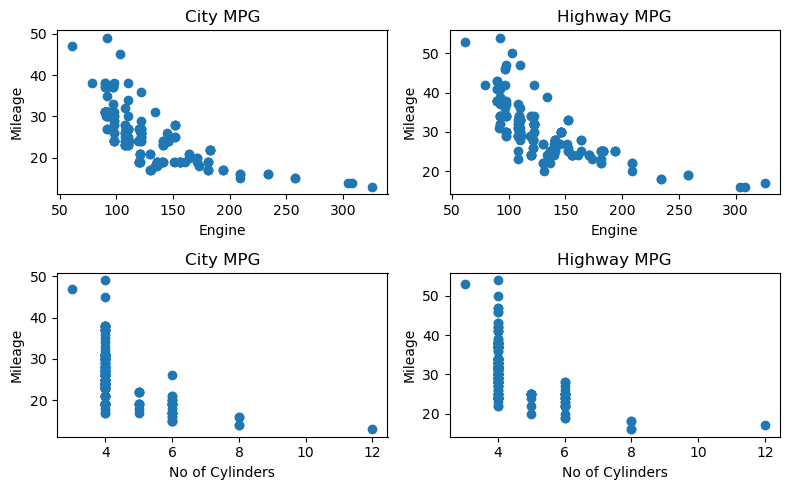

In [313]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Scatter plot 1
axes[0, 0].scatter(automobile_df['engine-size'], automobile_df['city-mpg'])
axes[0, 0].set_title('City MPG')
axes[0, 0].set_xlabel('Engine')
axes[0, 0].set_ylabel('Mileage')

# Scatter plot 2
axes[0, 1].scatter(automobile_df['engine-size'], automobile_df['highway-mpg'])
axes[0, 1].set_title('Highway MPG')
axes[0, 1].set_xlabel('Engine')
axes[0, 1].set_ylabel('Mileage')

# Scatter plot 3
axes[1, 0].scatter(automobile_df['num-of-cylinders'], automobile_df['city-mpg'])
axes[1, 0].set_title('City MPG')
axes[1, 0].set_xlabel('No of Cylinders')
axes[1, 0].set_ylabel('Mileage')

# Scatter plot 4
axes[1, 1].scatter(automobile_df['num-of-cylinders'], automobile_df['highway-mpg'])
axes[1, 1].set_title('Highway MPG')
axes[1, 1].set_xlabel('No of Cylinders')
axes[1, 1].set_ylabel('Mileage')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


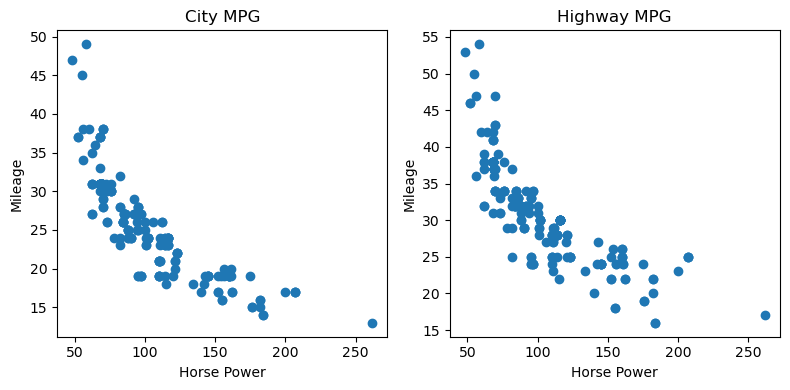

In [314]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Scatter plot 1
axes[0].scatter(automobile_df['horsepower'], automobile_df['city-mpg'])
axes[0].set_title('City MPG')
axes[0].set_xlabel('Horse Power')
axes[0].set_ylabel('Mileage')

# Scatter plot 2
axes[1].scatter(automobile_df['horsepower'], automobile_df['highway-mpg'])
axes[1].set_title('Highway MPG')
axes[1].set_xlabel('Horse Power')
axes[1].set_ylabel('Mileage')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

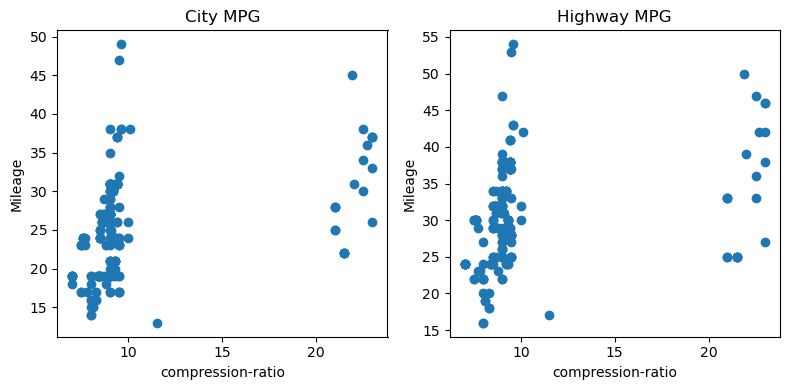

In [315]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Scatter plot 1
axes[0].scatter(automobile_df['compression-ratio'], automobile_df['city-mpg'])
axes[0].set_title('City MPG')
axes[0].set_xlabel('compression-ratio')
axes[0].set_ylabel('Mileage')

# Scatter plot 2
axes[1].scatter(automobile_df['compression-ratio'], automobile_df['highway-mpg'])
axes[1].set_title('Highway MPG')
axes[1].set_xlabel('compression-ratio')
axes[1].set_ylabel('Mileage')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

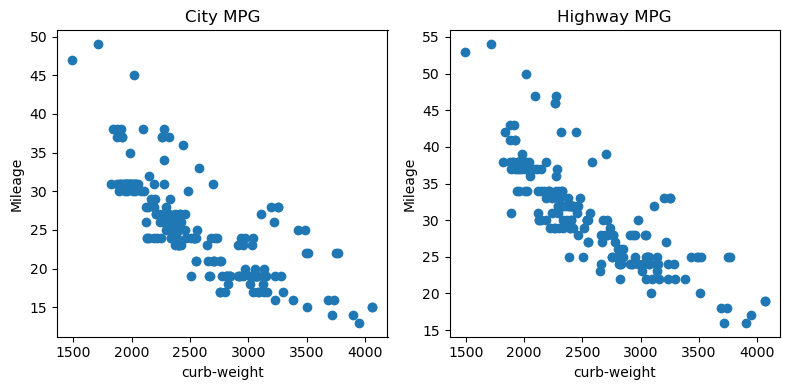

In [316]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Scatter plot 1
axes[0].scatter(automobile_df['curb-weight'], automobile_df['city-mpg'])
axes[0].set_title('City MPG')
axes[0].set_xlabel('curb-weight')
axes[0].set_ylabel('Mileage')

# Scatter plot 2
axes[1].scatter(automobile_df['curb-weight'], automobile_df['highway-mpg'])
axes[1].set_title('Highway MPG')
axes[1].set_xlabel('curb-weight')
axes[1].set_ylabel('Mileage')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [317]:
automobile_corr = automobile_df.corr()

automobile_corr

,wheel-base,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
wheel-base,1.000000,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,...,-0.226549,-0.191453,0.161498,-0.198283,-0.408137,0.303643,-0.035173,0.353528,-0.123350,-0.033999
curb-weight,0.782720,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,...,-0.427752,-0.083765,0.406875,-0.239916,-0.576042,0.219488,0.034569,0.513729,-0.003923,0.024007
engine-size,0.569704,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,...,-0.413663,-0.024251,0.573963,-0.180889,-0.463268,0.063490,0.048750,0.477437,-0.000855,-0.015528
bore,0.498228,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,...,-0.410206,0.334928,0.122669,-0.298637,-0.343168,0.056245,0.071650,0.415168,-0.004007,0.026639
stroke,0.171722,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,...,0.374057,-0.531611,-0.041602,0.148745,-0.223778,0.253774,0.148880,-0.143188,0.261118,-0.004654
compression-ratio,0.247730,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,...,0.027587,-0.088465,-0.090495,-0.057300,-0.193721,0.985398,-0.056615,-0.314185,-0.157172,-0.017631
horsepower,0.375541,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,...,-0.426091,0.054477,0.468873,-0.173002,-0.556696,-0.168454,0.079315,0.644574,0.131065,-0.025226
peak-rpm,-0.352331,-0.278944,-0.219008,-0.277662,-0.068300,-0.444582,0.105654,1.000000,-0.069493,-0.016950,...,0.099893,-0.061489,-0.048124,0.352433,-0.076395,-0.480952,-0.015293,0.170737,0.083968,-0.015293
city-mpg,-0.499126,-0.772171,-0.710624,-0.591950,-0.027641,0.331413,-0.834117,-0.069493,1.000000,0.972350,...,0.364095,-0.041038,-0.360194,0.232834,0.496108,0.260796,-0.071677,-0.664855,-0.135391,-0.015454
highway-mpg,-0.566355,-0.812710,-0.732138,-0.600040,-0.036453,0.267941,-0.812917,-0.016950,0.972350,1.000000,...,0.408130,-0.052593,-0.377060,0.204757,0.508524,0.193998,-0.072104,-0.631558,-0.113273,-0.019404


In [318]:
automobile = automobile_df.sample(frac=1).reset_index(drop=True)
automobile.head()

,wheel-base,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,114.2,3485,152,3.70,3.52,21.0,95.0,4150.0,25,25,...,0,0,0,0,0,1,0,0,0,0
1,101.2,2395,108,3.50,2.80,8.8,101.0,5800.0,23,29,...,1,0,0,0,0,0,0,1,0,0
2,98.4,2536,146,3.62,3.50,9.3,116.0,4800.0,24,30,...,1,0,0,0,0,0,0,1,0,0
3,110.0,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,...,1,0,0,0,0,0,0,1,0,0
4,96.3,2328,122,3.35,3.46,8.5,88.0,5000.0,25,32,...,1,0,0,0,1,0,0,0,0,0


In [319]:
automobile.to_csv('datasets/auto-processed.csv', index=False)